In [4]:
# 3d surfacr plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


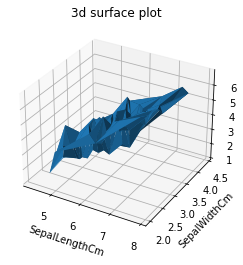

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.plot_trisurf(df["SepalLengthCm"],df["SepalWidthCm"],df["PetalLengthCm"])

plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("3d surface plot")
plt.show()

In [9]:
! pip install --upgrade pandas

Requirement already up-to-date: pandas in d:\anaconda\lib\site-packages (2.0.3)


In [18]:
# BFS

from queue import PriorityQueue

def bfs(gra,s,g,h):
    vis=set()
    pq=PriorityQueue()
    pq.put((heu[s],s))
    
    while not pq.empty():
        val,node=pq.get()
        
        if node==g:
            print("Visited the goal !!")
            return
        if node not in vis:
            print("Visiting node : ",node)
            vis.add(node)
            
            for nei,val in gra[node]:
                if nei not in vis:
                    pq.put((heu[nei],nei))
    print("Goal not found !!")
    
    
# gra = {
#     'S': [('A', 0), ('B', 0)],
#     'A': [('C', 0), ('D', 0)],
#     'B': [('E', 0), ('F', 0)],
#     'E': [('H', 0)],
#     'F': [('I', 0), ('G', 0)],
#     'G': [],
#     'C': [],
#     'D': [],
#     'H': [],
#     'I': [],
#     'J':[]
# }

# heu = {
#     'A': 12,
#     'B': 4,
#     'C': 7,
#     'D': 3,
#     'E': 8,
#     'F': 2,
#     'H': 4,
#     'I': 9,
#     'G': 0,
#     'S': 13,
#     'J':5
# }

# s = 'S'
# g = 'J'


gra = {
    'S': [('A', 0), ('B', 0)],
    'A': [('C', 0), ('D', 0)],
    'B': [('E', 0), ('F', 0)],
    'E': [('H', 0)],
    'F': [('I', 0), ('G', 0)],
    'G': [],
    'C': [],
    'D': [],
    'H': [],
    'I': []

}

s = 'S'
g = 'I'

#Heuristic values from curr node -> goal node
heu = {
    'A': 12,
    'B': 4,
    'C': 7,
    'D': 3,
    'E': 8,
    'F': 2,
    'H': 4,
    'I': 9,
    'G': 0,
    'S': 13
}

bfs(gra, s, g, heu)

Visiting node :  S
Visiting node :  B
Visiting node :  F
Visiting node :  G
Visiting node :  E
Visiting node :  H
Visited the goal !!


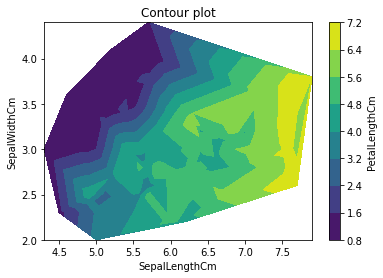

In [20]:
# contour plots

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Iris.csv")
plt.figure()
plt.tricontourf(df["SepalLengthCm"],df["SepalWidthCm"],df["PetalLengthCm"])
plt.colorbar(label="PetalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Contour plot")
plt.show()

In [187]:
# a* algo

from queue import PriorityQueue

def a_star(gra,src,goal,heu):
    vis=[]
    pq=PriorityQueue()
    pq.put((0, [src]))
    
    while not pq.empty():
        cost, path=pq.get()
        node=path[-1]
        
        if node == goal:
            vis.append(node)
            return (vis,path)
        vis.append(node)
        for adj, wei in gra[node]:
            if adj not in vis: 
                pri=heu[adj]
                new_path=list(path)
                new_path.append(adj)
                pq.put(((pri+wei),new_path))
    
    return None

n=4
graph=[[] for _ in range(n)]
e=5

graph[0].append((1, 1))
graph[0].append((2, 3))
graph[0].append((3, 7))
graph[1].append((3, 5))
graph[2].append((3, 12))
heuristic = {}
heuristic[0] =1
heuristic[1] =1
heuristic[2] =1
heuristic[3] =1

src = 0
dest = 3

res = a_star(graph,src, dest, heuristic)
if res == None:
    print("There is no path from given source to destination")
else:
    print("The path is: ")
    for i in res[1]:
        print(i, end=" --> ")
    print()
    print("The visited order is: ")
    for i in res[0]:
        print(i, end=" --> ")
    print()

The path is: 
0 --> 1 --> 3 --> 
The visited order is: 
0 --> 1 --> 2 --> 3 --> 


In [188]:
from queue import PriorityQueue
    
def a_star_algorithm(graph, heuristic, source, goal):
    visited = []
    pq = PriorityQueue()
    pq.put((0, [source]))
    
    while not pq.empty():
        cost, path = pq.get()
        node = path[-1]
        
        if node == goal:
            visited.append(node)
            return (visited, path)
        
        visited.append(node)
        
        for adj, weight in graph[node]:
            if adj not in visited:
                pri = heuristic[adj]  
                new_path = list(path)
                new_path.append(adj)
                pq.put(((pri + weight), new_path))
                
    return None
    
n=4
graph=[[] for _ in range(n)]
e=5

graph[0].append((1, 1))
graph[0].append((2, 3))
graph[0].append((3, 7))
graph[1].append((3, 5))
graph[2].append((3, 12))
heuristic = {}
heuristic[0] =1
heuristic[1] =1
heuristic[2] =1
heuristic[3] =1

src = 0
dest = 3

res = a_star(graph,src, dest, heuristic)
if res == None:
    print("There is no path from given source to destination")
else:
    print("The path is: ")
    for i in res[1]:
        print(i, end=" --> ")
    print()
    print("The visited order is: ")
    for i in res[0]:
        print(i, end=" --> ")
    print()

The path is: 
0 --> 1 --> 3 --> 
The visited order is: 
0 --> 1 --> 2 --> 3 --> 


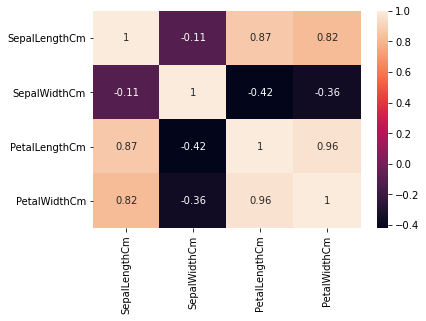

In [27]:
#heat maps

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Iris.csv")
dim=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
cor_mat=df[dim].corr()
sns.heatmap(cor_mat,annot=True)
plt.show()

In [28]:
! pip install --upgrade seaborn

Requirement already up-to-date: seaborn in d:\anaconda\lib\site-packages (0.12.2)


In [32]:
#  min-max algo

class T:
    def __init__(self,val,child=[]):
        self.val=val
        self.child=child

def minmax(node,depth,player):
    if depth==0 or not node.child:
        return node.val,[node.val]
    if player:
        max_val=float("-inf")
        max_path=[]
        for i in node.child:
            child_val,child_path=minmax(i,depth-1,False)
            if child_val>max_val:
                max_val=child_val
                max_path=[node.val]+child_path
        return max_val,max_path
    else:
        min_val=float("inf")
        min_path=[]
        for i in node.child:
            child_val,child_path=minmax(i,depth-1,True)
            if child_val<min_val:
                min_val=child_val
                min_path=[node.val]+child_path
        return min_val,min_path

tree=T(0, [T(4), T(16)])
tree = T(4, [T(3, [T(5, [T(1),T(2)]), T(6)]), T(2, [T(9), T(3)])])

opti_val,opti_path=minmax(tree,8,True)
print("optimal value : ",opti_val)
print("optimal path : ",opti_path)

optimal value :  3
optimal path :  [4, 2, 3]


In [34]:
# box plt

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


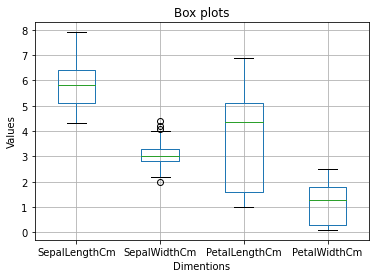

In [35]:
dim=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
df[dim].boxplot()
plt.xlabel("Dimentions")
plt.ylabel("Values")
plt.title("Box plots")
plt.show()

In [38]:
t=float("-inf")+2
print(t)

-inf


In [40]:
# alpha-beta pruning

class T:
    def __init__(self,val,child=[]):
        self.val=val
        self.child=child
def alphabeta(node,depth,player,alpha,beta):
    if depth==0 or not node.child:
        return node.val,[node.val]
    if player:
        max_val=float("-inf")
        max_path=[]
        for i in node.child:
            child_val,child_path=alphabeta(i,depth-1,False,alpha,beta)
            if child_val>max_val:
                max_val=child_val
                max_path=[node.val]+child_path
            alpha=max(alpha,max_val)
            if alpha>=beta:
                break
        return max_val,max_path
    else:
        min_val=float("inf")
        min_path=[]
        for i in node.child:
            child_val,child_path=alphabeta(i,depth-1,True,alpha, beta)
            if child_val<min_val:
                min_val=child_val
                min_path=[node.val]+child_path
            beta=min(beta,min_val)
            if alpha>=beta:
                break
        return min_val,min_path

tree=T(0, [T(4), T(16)])
tree = T(4, [T(3, [T(5, [T(1),T(2)]), T(6)]), T(2, [T(9), T(3)])])
tree=T(1, [T(2, [T(3, [T(2), T(3)]),T(4, [T(5), T(9)])]), T(5, [T(6, [T(0), T(1)]),T(7, [T(7), T(5)])])])
opti_val,opti_path=alphabeta(tree,8,True,float("-inf"),float("inf"))
print("optimal value : ",opti_val)
print("optimal path : ",opti_path)

optimal value :  3
optimal path :  [1, 2, 3, 3]


naive bayes titanic 

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [120]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
df=df.drop(columns=["PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

In [123]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [124]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [125]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [126]:
df["Embarked"].fillna('S',inplace=True)

In [127]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [128]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [129]:
df.replace({"Sex":{"male":0,"female":1}},inplace=True)
df.replace({"Embarked": {'S':0,'C':1,'Q':2}},inplace=True)

In [130]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [131]:
def calc_prior(df,Y):
    classes=sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [132]:
def calc_likelihood(df,Y,label,f_name,f_val):
    df=df[df[Y]==label]
    mean,std=df[f_name].mean(),df[f_name].std()
    p_x_g_y=(1/(np.sqrt(2*np.pi)*std))*np.exp(-((f_val-mean)**2/(2 * std**2)))
    return p_x_g_y

In [133]:
def naive_bayes(df,X,Y):
    f=list(df.columns)[1:]
    prior=calc_prior(df,Y)
    
    Y_pred=[]
    for x in X:
        label=sorted(list(df[Y].unique()))
        likelihood=[1]*len(label)
        for i in range(len(label)):
            for j in range(len(f)):
                likelihood[i]*=calc_likelihood(df,Y,label[i],f[j],x[j])
        
        post_prob=[1]*len(label)
        for j in range(len(label)):
            post_prob[j]=likelihood[j]*prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [134]:
train,test=train_test_split(df,test_size=0.3,random_state=41)
X_test=test.iloc[:,1:].values
Y_test=test.iloc[:,0].values

Y_pred=naive_bayes(train,X=X_test,Y="Survived")

print("confusion matrix : ")
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Classification report : ")
print(classification_report(Y_test,Y_pred))

print("Enter the new value : ")
check=[3,0,39,1,5,0]
ans=naive_bayes(train,X=[check],Y="Survived")
print("Ans : ",ans)

confusion matrix : 
[[126  36]
 [ 21  85]]
Accuracy:  0.7873134328358209
Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       162
           1       0.70      0.80      0.75       106

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268

Enter the new value : 
Ans :  [0]


knn glass eucid

In [152]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [153]:
def euclid(x1,x2):
    d=np.sqrt(np.sum((x1-x2)**2))
    return d

class KNN:
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,Y):
        self.X_train=X
        self.Y_train=Y
    
    def predict(self,X):
        p=[self.calculate(i) for i in X]
        return p
    
    def calculate(self,x):
        dist=[euclid(x,i) for i in self.X_train]
        k_index=np.argsort(dist)[:self.k]
        k_nearest=[self.Y_train[i] for i in k_index]
        common=Counter(k_nearest).most_common()
        
        return common[0][0]

In [154]:
df=pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [155]:
X=df.drop(columns="Type",axis=1).values
Y=df["Type"].values


In [166]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
clf=KNN(3)
clf.fit(X_train,Y_train)
Y_pred=list(clf.predict(X_test))

acc=np.sum(Y_pred==Y_test)/ len(Y_test)
print("Accuracy : ",acc)
print("Confusion matrix: ")
print(confusion_matrix(Y_test,Y_pred))
print("Classification report: ")
print(classification_report(Y_test,Y_pred))

print("Entee the data for classification : ")
q=[1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0] #1
q=[1.51602,14.85,0,2.38,73.28,0,8.76,0.64,0.09 ]  #7
predict=clf.predict([q])
print("Ans : ",predict)

Accuracy :  0.676923076923077
Confusion matrix: 
[[13  3  3  0  0  0]
 [ 5 14  0  0  3  1]
 [ 1  0  3  0  0  0]
 [ 0  2  0  4  0  0]
 [ 0  1  0  0  1  1]
 [ 0  0  0  0  1  9]]
Classification report: 
              precision    recall  f1-score   support

           1       0.68      0.68      0.68        19
           2       0.70      0.61      0.65        23
           3       0.50      0.75      0.60         4
           5       1.00      0.67      0.80         6
           6       0.20      0.33      0.25         3
           7       0.82      0.90      0.86        10

    accuracy                           0.68        65
   macro avg       0.65      0.66      0.64        65
weighted avg       0.71      0.68      0.68        65

Entee the data for classification : 
Ans :  [7]


knn fruit manhatten

In [167]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [168]:
def man(x1,x2):
    d=np.sum(np.abs(x1-x2))
    return d

class KNN:
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,Y):
        self.X_train=X
        self.Y_train=Y
    
    def predict(self,X):
        p=[self.calculate(i) for i in X]
        return p
    
    def calculate(self,x):
        dist=[man(x,i) for i in self.X_train]
        k_index=np.argsort(dist)[:self.k]
        k_nearest=[self.Y_train[i] for i in k_index]
        common=Counter(k_nearest).most_common()
        
        return common[0][0]

In [169]:
df=pd.read_csv("fruit.csv")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [173]:
df=df.drop(columns=["fruit_name","fruit_subtype"],axis=1)
df.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [174]:
X=df.drop(columns="fruit_label",axis=1).values
Y=df["fruit_label"].values

In [180]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
clf=KNN(5)
clf.fit(X_train,Y_train)
Y_pred=list(clf.predict(X_test))
print(X_test)
acc=np.sum(Y_pred==Y_test)/ len(Y_test)
print("Accuracy : ",acc)
print("Confusion matrix: ")
print(confusion_matrix(Y_test,Y_pred))
print("Classification report: ")
print(classification_report(Y_test,Y_pred))

print("Entee the data for classification : ")
q=[130,6,8.2,0.71] #4
# q=[164,7.2,7,0.8]  #3
predict=clf.predict([q])
print("Ans : ",predict)

[[192.     8.4    7.3    0.55]
 [ 80.     5.8    4.3    0.77]
 [142.     7.6    7.8    0.75]
 [164.     7.3    7.7    0.7 ]
 [186.     7.2    9.2    0.72]
 [120.     6.     8.4    0.74]
 [152.     6.5    8.5    0.72]
 [356.     9.2    9.2    0.75]
 [196.     7.3    9.7    0.72]
 [154.     7.     7.1    0.88]
 [132.     5.8    8.7    0.73]
 [ 86.     6.2    4.7    0.8 ]
 [160.     7.1    7.6    0.76]
 [210.     7.8    8.     0.82]
 [178.     7.1    7.8    0.92]
 [168.     7.5    7.6    0.73]
 [ 80.     5.9    4.3    0.81]
 [ 84.     6.     4.6    0.79]]
Accuracy :  0.4444444444444444
Confusion matrix: 
[[3 0 2 0]
 [0 0 0 4]
 [0 0 3 1]
 [0 0 3 2]]
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         4
           3       0.38      0.75      0.50         4
           4       0.29      0.40      0.33         5

    accuracy                           0.44       

In [40]:
# pca 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    def __init__(self,n_comp):
        self.n_comp=n_comp
        self.comp=None
        self.mean=None
    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigenvec,eigenval=np.linalg.eig(cov)
        eigenvec=eigenvec.T
        index=np.argsort(eigenval)[::-1]
        eigenval=eigenval[index]
        eigenvec=eigenvec[index]
        
        self.comp=eigenvec[:self.n_comp]
        
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.comp.T)

In [41]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
X=df.drop(columns=["Species","Id"]).values
df.replace({"Species":{"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}},inplace=True)
Y=df["Species"].values

In [43]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

Shape : (150, 4)
 After shape :  (150, 2)


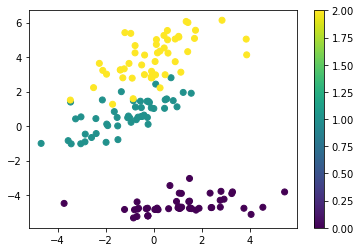

In [46]:
pca=PCA(2)
pca.fit(X)
X_project=pca.transform(X)

print("Shape :",X.shape)
print(" After shape : ",X_project.shape)
plt.scatter(X_project[:,0],X_project[:,1],c=Y)
plt.colorbar()
plt.show()

(4, 4)
(120, 2)


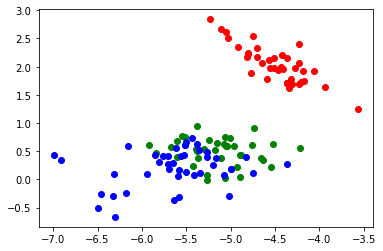

old : (120, 4)
new :  (120, 2)


In [155]:
# LDA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class LDA:
    def __init__(self,n_comp=None):
        self.n_comp=n_comp
        self.eigenvec=None
    def transform(self,X,Y):
        hei,wid=X.shape
        uni_classes=np.unique(Y)
        no_classes=len(uni_classes)
        
        sct_t=np.cov(X.T)*(hei-1)
        sct_w=0
#   tweb
        for i in range(no_classes):
            class_item=np.flatnonzero(Y==uni_classes[i])
            sct_w=sct_w + np.cov(X[class_item].T)*(len(class_item)-1)
        sct_b=sct_t=sct_w
        _,eigenvec=np.linalg.eigh(np.linalg.pinv(sct_w).dot(sct_b))
        print(eigenvec.shape)
        pc=X.dot(eigenvec[:,::-1][:,:self.n_comp])
        print(pc.shape)
        
        if self.n_comp==2:
            if Y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                clr=['r','g','b']
                label=np.unique(Y)
                for clr,label in zip(clr,label):
                    class_data=pc[np.flatnonzero(Y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=clr)
            plt.show()
        return pc
lda=LDA(2)  
df=pd.read_csv("Iris.csv")
df=df.drop(columns=["Id"],axis=1)
X=df.drop("Species",axis=1).values
Y=df["Species"].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

lda=LDA(2)
X_train_mod=lda.transform(X_train,Y_train)

print("old :",X_train.shape)
print("new : ",X_train_mod.shape)

In [152]:
# kmeans

def kmeans(X,k,max_iter=100):
    cen=X[:k]
    for _ in range(max_iter):
        label=np.argmin(np.linalg.norm(X[:,np.newaxis]-cen,axis=2),axis=1)
        new_cen=np.array([X[label==k].mean(axis=0) for k in range(k)])
        if np.all(cen==new_cen):
            break
        cen=new_cen
    return label,cen
data = pd.read_csv('Iris.csv')
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [79]:
data.replace({'Species' : {"Iris-setosa" : 0,"Iris-virginica": 2,"Iris-versicolor":1}},inplace=True)
X=data.drop(columns=["Species","Id"],axis=1).values

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]
Accuarcy :  0.31333333333333335


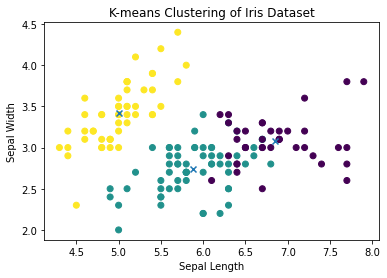

In [83]:
k=3
label,cen=kmeans(X,k)

print("Labels:",label)
print("Centroids:",cen)

Y_actual=list(data["Species"])
Y_pred=list(label)

cnt=0
for i in range(len(Y_actual)):
    if(Y_actual[i]==Y_pred[i]):
        cnt=cnt+1

print("Accuarcy : ",(cnt/len(Y_actual)))

plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(cen[:, 0], cen[:, 1], marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

Single linkage : 
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


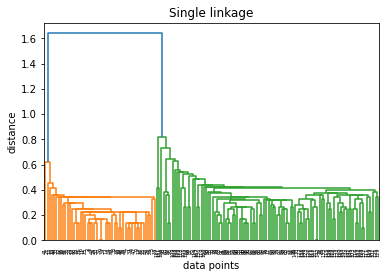

Complete linkage : 
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


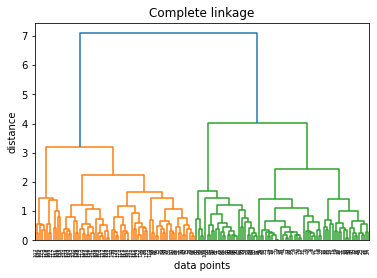

In [88]:
# single linkage ,complete linkafe

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

def single_link(data):
    n=data.shape[0]
    pm=np.zeros((n,n))
    
    for i in range(n):
        for j in range(i+1,n):
            pm[i,j]=np.min(np.linalg.norm(data[i]-data[j]))
            pm[j,i]=pm[i,j]
    return pm

def complete_link(data):
    n=data.shape[0]
    pm=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            pm[i,j]=np.max(np.linalg.norm(data[i]-data[j]))
            pm[j,i]=pm[i,j]
    return pm

df=pd.read_csv("Iris.csv")
df=df.drop(columns=["Id","Species"],axis=1).values

single=single_link(df)
print("Single linkage : ")
print(single)

link_matrix=linkage(df,method="single")
dendrogram(link_matrix)
plt.xlabel("data points")
plt.ylabel("distance")
plt.title("Single linkage")
plt.show()


complete=complete_link(df)
print("Complete linkage : ")
print(complete)

link_matrix=linkage(df,method="complete")
dendrogram(link_matrix)
plt.xlabel("data points")
plt.ylabel("distance")
plt.title("Complete linkage")
plt.show()